Data Kompetisi Angkatan 2023 untuk Kebutuhan PILMAPRES 2025

Contoh:


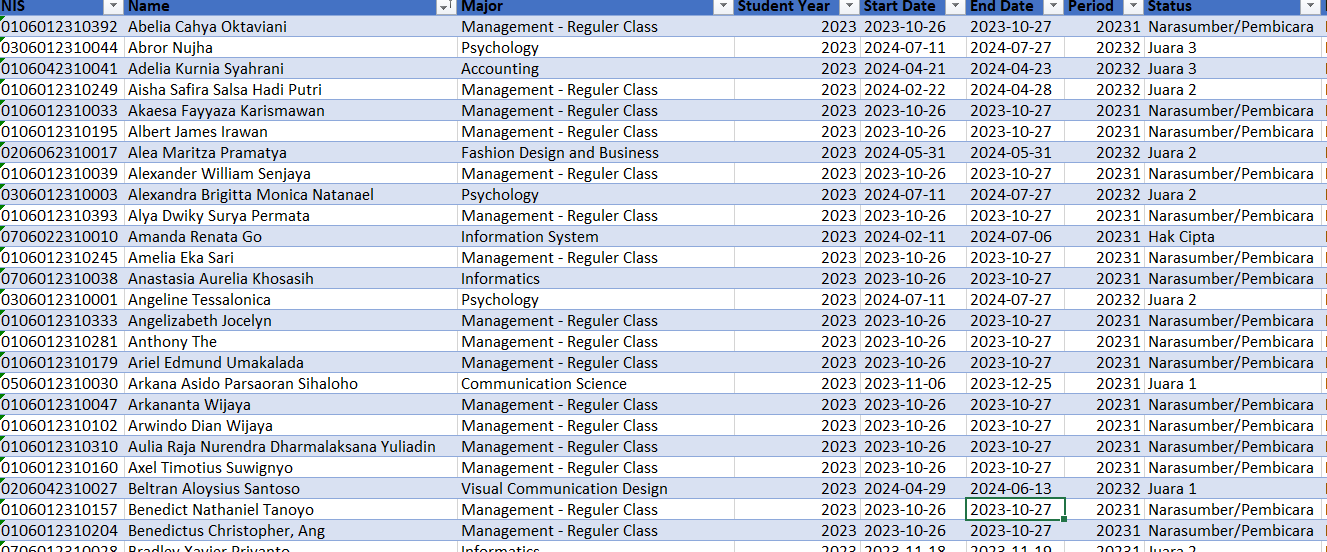

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('pilmapres.csv', encoding='utf-8', encoding_errors='ignore', delimiter=";", dtype={'NIS': str})
df.head()

,NIS,Name,Major,Student Year,Start Date,End Date,Period,Status,Level,Participant As,Total Participant,Field,Criteria,Score
0,0106012310392,Abelia Cahya Oktaviani,Management - Reguler Class,2023.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,Pengakuan,Narasumber/Pembicara|External International|In...,25.0
1,0306012310044,Abror Nujha,Psychology,2023.0,2024-07-11,2024-07-27,20232.0,Juara 3,External National,Team,NaN,Kompetisi,Juara 3|External National|Team,8.0
2,0106042310041,Adelia Kurnia Syahrani,Accounting,2023.0,2024-04-21,2024-04-23,20232.0,Juara 3,External National,Individual,NaN,Kompetisi,Juara 3|External National|Individual,15.0
3,0106012310249,Aisha Safira Salsa Hadi Putri,Management - Reguler Class,2023.0,2024-02-22,2024-04-28,20232.0,Juara 2,External National,Team,NaN,Kompetisi,Juara 2|External National|Team,11.0
4,0106012310033,Akaesa Fayyaza Karismawan,Management - Reguler Class,2023.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,Pengakuan,Narasumber/Pembicara|External International|In...,25.0


In [3]:
strings_to_filter = ['External Regional', 'Regional', 'International']

# Create a regex pattern from the list of strings
pattern = '|'.join(strings_to_filter)

In [4]:
df['Level'].value_counts()

External International    100
External National          72
External Regional          19
Name: Level, dtype: int64

In [5]:
# Exclude Level HERE
df = df[~df['Level'].str.contains('External Regional', na=False)]

# Set Level HERE
# df = df[df['Level'].str.contains('External Regional', na=False)]

In [6]:
df['Major'].value_counts()

Management - Reguler Class              96
Psychology                              18
Visual Communication Design             12
Communication Science                   11
Tourism - Culinary Business              8
Information System                       6
Informatics                              4
Medical                                  4
Accounting                               3
Food Technology Program                  3
Fashion Design and Business              2
Management - International Class         2
Tourism - Hotel and Tourism Business     2
Architecture                             1
Name: Major, dtype: int64

In [7]:
# Exclude Major HERE
# df = df[~df['Major'].str.contains('Visual Communication Design', na=False)]

# Set Major HERE
# df = df[df['Major'].str.contains('Visual Communication Design', na=False)]

Data yang dimiliki sudah relatively rapi, tapi untuk membantu processing data, maka data akan di sorting awal

In [8]:
# Sorting sesuai NIS
df_sorted = df.sort_values(by=['NIS', 'Field', 'Score'], ascending=[True, True, False])
df_sorted.head()

,NIS,Name,Major,Student Year,Start Date,End Date,Period,Status,Level,Participant As,Total Participant,Field,Criteria,Score
162,0106012310015,Silviana Margaretha,Management - Reguler Class,2023.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,Pengakuan,Narasumber/Pembicara|External International|In...,25.0
163,0106012310016,Silviani Margaretha,Management - Reguler Class,2023.0,2024-05-31,2024-05-31,20232.0,Juara 2,External National,Team,NaN,Kompetisi,Juara 2|External National|Team,11.0
40,0106012310018,Dalia Susanto,Management - Reguler Class,2023.0,2024-01-20,2024-01-29,20231.0,Juara 3,External National,Team,NaN,Kompetisi,Juara 3|External National|Team,8.0
39,0106012310018,Dalia Susanto,Management - Reguler Class,2023.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,Pengakuan,Narasumber/Pembicara|External International|In...,25.0
152,0106012310024,Richard Savero Setiawan,Management - Reguler Class,2023.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,Pengakuan,Narasumber/Pembicara|External International|In...,25.0


Untuk kebutuhan PILMAPRES 2025, telah disediakan grading rubric untuk 7 total bidang di Pedoman PILMAPRES dimana ada beberapa rules yang harus dicatat. <br>
Rule pertama adalah seorang mahasiswa tidak boleh submit more than 4 scores per bidang/field. <br>
Rule kedua adalah seorang mahasiswa tidak boleh submit 10 scores secara total untuk 7 bidang tersebut. <br><br>

Untuk penanganan data mahasiswa yang telah submit more than 4 scores per field ataupun more than 10 secara total, ada beberapa pilihan seperti mengambil 4 scores tertinggi atau terkini per field dan 10 scores tertinggi atau terkini per student. Untuk case ini, akan diambil 4 scores tertinggi per field dan 10 scores tertinggi per student secara total.

In [9]:
# Rule: Max 4 scores per field per student
# Kalau ada yang submit diatas 4 kali di 1 bidang, maka ambil 4 score tertinggi student itu at that specific field
df_filtered_field = df_sorted.groupby(['NIS', 'Field']).head(4)
df_filtered_field.head()

,NIS,Name,Major,Student Year,Start Date,End Date,Period,Status,Level,Participant As,Total Participant,Field,Criteria,Score
162,0106012310015,Silviana Margaretha,Management - Reguler Class,2023.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,Pengakuan,Narasumber/Pembicara|External International|In...,25.0
163,0106012310016,Silviani Margaretha,Management - Reguler Class,2023.0,2024-05-31,2024-05-31,20232.0,Juara 2,External National,Team,NaN,Kompetisi,Juara 2|External National|Team,11.0
40,0106012310018,Dalia Susanto,Management - Reguler Class,2023.0,2024-01-20,2024-01-29,20231.0,Juara 3,External National,Team,NaN,Kompetisi,Juara 3|External National|Team,8.0
39,0106012310018,Dalia Susanto,Management - Reguler Class,2023.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,Pengakuan,Narasumber/Pembicara|External International|In...,25.0
152,0106012310024,Richard Savero Setiawan,Management - Reguler Class,2023.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,Pengakuan,Narasumber/Pembicara|External International|In...,25.0


In [10]:
df_filtered_field['Level'].value_counts()

External International    100
External National          72
Name: Level, dtype: int64

In [11]:
df_filtered_field['Status'].value_counts()

Narasumber/Pembicara    89
Juara 2                 35
Juara 1                 27
Juara 3                 15
Hak Cipta                6
Name: Status, dtype: int64

In [12]:
df_filtered_field['Period'].value_counts()

20231.0    111
20232.0     61
Name: Period, dtype: int64

In [13]:
df_filtered_field['Major'].value_counts()

Management - Reguler Class              96
Psychology                              18
Visual Communication Design             12
Communication Science                   11
Tourism - Culinary Business              8
Information System                       6
Medical                                  4
Informatics                              4
Accounting                               3
Food Technology Program                  3
Management - International Class         2
Fashion Design and Business              2
Tourism - Hotel and Tourism Business     2
Architecture                             1
Name: Major, dtype: int64

In [14]:
# Sum of scores per bidang per student
df_field_totals = df_filtered_field.groupby(['NIS', 'Name', 'Field'])['Score'].sum().reset_index()
df_field_totals.head()

,NIS,Name,Field,Score
0,0106012310015,Silviana Margaretha,Pengakuan,25.0
1,0106012310016,Silviani Margaretha,Kompetisi,11.0
2,0106012310018,Dalia Susanto,Kompetisi,8.0
3,0106012310018,Dalia Susanto,Pengakuan,25.0
4,0106012310024,Richard Savero Setiawan,Pengakuan,25.0


In [15]:
# Sum of scores per student
df_total_scores_per_student = df_field_totals.groupby(['NIS', 'Name'])['Score'].sum().reset_index()
df_total_scores_per_student.head()

,NIS,Name,Score
0,0106012310015,Silviana Margaretha,25.0
1,0106012310016,Silviani Margaretha,11.0
2,0106012310018,Dalia Susanto,33.0
3,0106012310024,Richard Savero Setiawan,25.0
4,0106012310028,Vanessa Adonia,25.0


In [16]:
# Sorting sesuai score tertinggi (Descending)
df_total_scores_per_student_sorted = df_total_scores_per_student.sort_values(by='Score', ascending=False)
print(df_total_scores_per_student_sorted)

               NIS                          Name  Score
134  0406022310068             Rania Zahra Iasha   55.0
151  0606012310102        Celine Natalie Johnson   50.0
131  0406022310040              Vivian Villareal   40.0
104  0206042310027      Beltran Aloysius Santoso   35.0
101  0206042310010         Joy Janny Thenarianto   35.0
..             ...                           ...    ...
126  0306012310044                   Abror Nujha    8.0
161  0706022310029      Valentyno Marcel Gunawan    8.0
149  0606012310013  Hisyam Darius Haffian Amadeo    0.0
157  0706022310010              Amanda Renata Go    0.0
158  0706022310013        Sherin Alvinia Yonatan    0.0

[162 rows x 3 columns]


Untuk PILMAPRES 2025, best case scenario adalah untuk menutuskan sekitar 10 anak untuk mewakili UC, maka hasil akan di filter untuk menunjukkan 10 mahasiswa dengan score tertinggi.

In [17]:
# Untuk kebutuhan pilmapres 2025, ambil 10 students dengan score tertinggi
df_total_scores_per_student_filtered = df_total_scores_per_student_sorted.head(10)
print(df_total_scores_per_student_filtered)

               NIS                          Name  Score
134  0406022310068             Rania Zahra Iasha   55.0
151  0606012310102        Celine Natalie Johnson   50.0
131  0406022310040              Vivian Villareal   40.0
104  0206042310027      Beltran Aloysius Santoso   35.0
101  0206042310010         Joy Janny Thenarianto   35.0
102  0206042310017     Matthew Sebastian Lesmana   35.0
103  0206042310022     Michelle Jocelyn Julianto   35.0
111  0206042310080  Kaylia Christibella Paparang   35.0
112  0206042310110        Steven Setiawan Djorgi   35.0
2    0106012310018                 Dalia Susanto   33.0


In [18]:
total_scores_final = df_total_scores_per_student_filtered.groupby(['NIS', 'Name'])['Score'].sum().reset_index()
print(total_scores_final)

             NIS                          Name  Score
0  0106012310018                 Dalia Susanto   33.0
1  0206042310010         Joy Janny Thenarianto   35.0
2  0206042310017     Matthew Sebastian Lesmana   35.0
3  0206042310022     Michelle Jocelyn Julianto   35.0
4  0206042310027      Beltran Aloysius Santoso   35.0
5  0206042310080  Kaylia Christibella Paparang   35.0
6  0206042310110        Steven Setiawan Djorgi   35.0
7  0406022310040              Vivian Villareal   40.0
8  0406022310068             Rania Zahra Iasha   55.0
9  0606012310102        Celine Natalie Johnson   50.0


In [19]:
res = total_scores_final.sort_values(by='Score', ascending=False).head(10)

res.columns = ['NIS', 'Name', 'Total_Score']

print(res)

             NIS                          Name  Total_Score
8  0406022310068             Rania Zahra Iasha         55.0
9  0606012310102        Celine Natalie Johnson         50.0
7  0406022310040              Vivian Villareal         40.0
1  0206042310010         Joy Janny Thenarianto         35.0
2  0206042310017     Matthew Sebastian Lesmana         35.0
3  0206042310022     Michelle Jocelyn Julianto         35.0
4  0206042310027      Beltran Aloysius Santoso         35.0
5  0206042310080  Kaylia Christibella Paparang         35.0
6  0206042310110        Steven Setiawan Djorgi         35.0
0  0106012310018                 Dalia Susanto         33.0


In [20]:
output_path = 'C:\\Users\\hansj\\OneDrive\\Documents\\Student Affairs\\Projects\\PILMAPRES\\Angkatan 2023\\output_2023.xlsx'
res.to_excel(output_path, index=False)

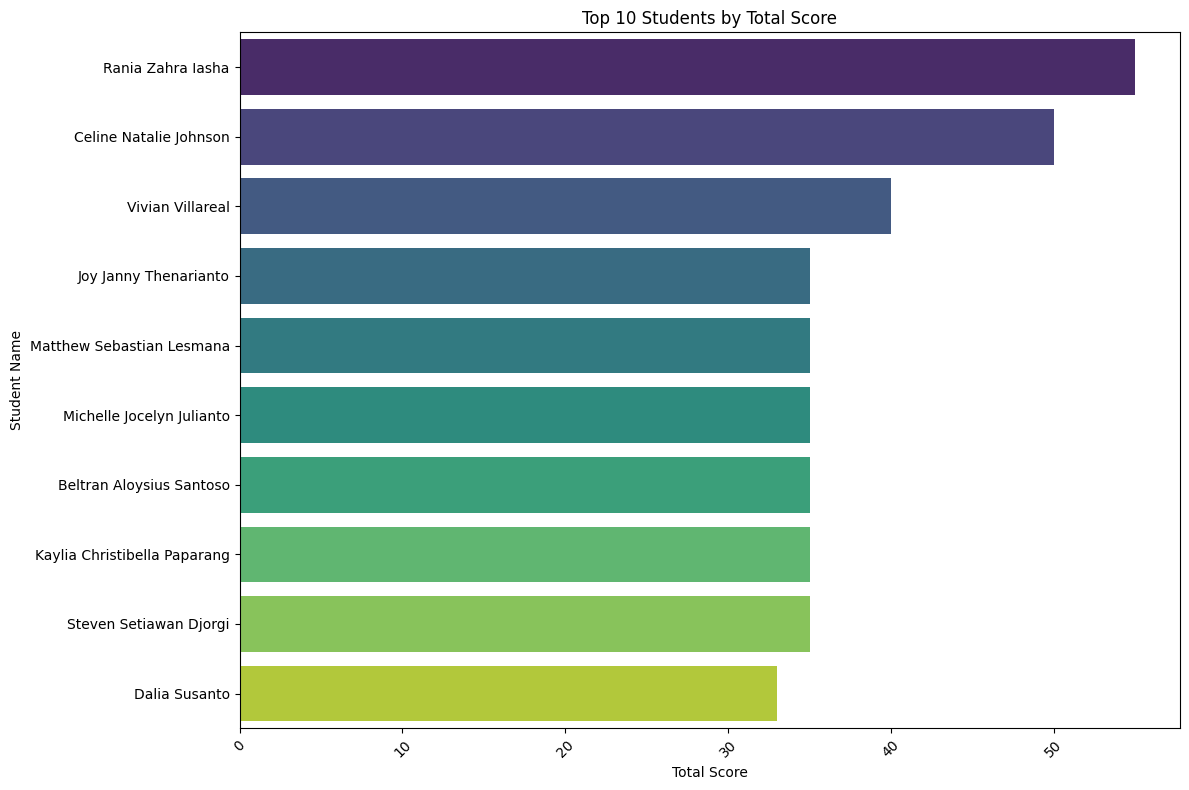

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Score', y='Name', data=res, palette='viridis')
plt.title('Top 10 Students by Total Score')
plt.xlabel('Total Score')
plt.ylabel('Student Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Score Distribution Among Top 10 Students')

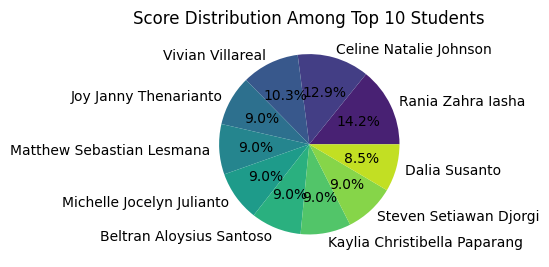

In [22]:
plt.subplot(1, 2, 2)
plt.pie(res['Total_Score'], labels=res['Name'], autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(res)))
plt.title('Score Distribution Among Top 10 Students')

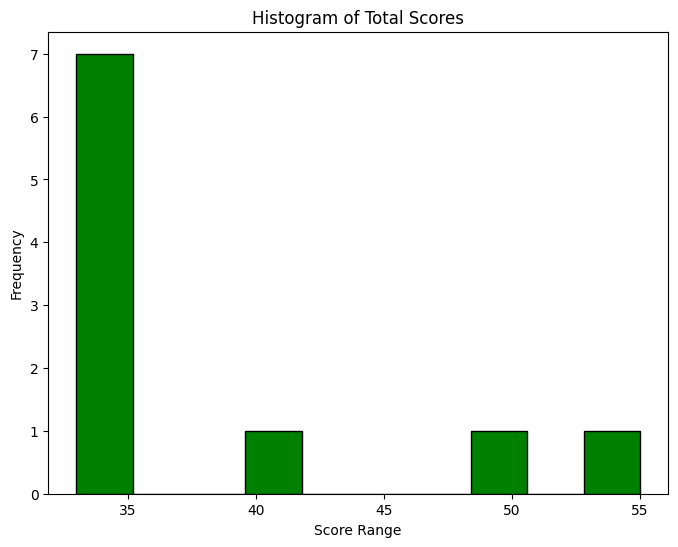

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(res['Total_Score'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Total Scores')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.show()


In [24]:
res.describe()

,Total_Score
count,10.000000
mean,38.800000
std,7.524774
min,33.000000
25%,35.000000
50%,35.000000
75%,38.750000
max,55.000000
